In [1]:
import numpy as np
import scipy.io as sio
from skimage.io import imread
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
from matplotlib import image
import glob
import os

In [2]:
def eigsort(V, eigvals):
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [3]:
def viewcolumn(columnvector):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(columnvector.reshape([144, 144, 3], order='F').astype('uint8'))
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [4]:
def enterAnimal(animal):
    test_dir = animal

    images = []
    for filename in glob.glob(test_dir + "/*.jpg"):
        im = imread(filename)
        images.append(im)
    images= np.array(images)
    image=images.reshape(60, 144*144*3, order='F')
    return(image)

In [5]:
def pca(imgs, graph_disable):
    mean=np.mean(imgs.T, axis=1)
    mean=mean[:,None]
    A = imgs.T-mean
    lambda2, eig2 = np.linalg.eig(A.T @ A)
    sorted_V, sorted_lambda=eigsort(eig2, lambda2)
    U = A@sorted_V
    U = normc(U)
    if(graph_disable == 0):
        fig = plt.figure()
        ax = fig.add_subplot()
        ax.plot(range(60), np.diag(sorted_lambda), '*-', color='red')
    return(U, mean)

In [6]:
def compress(dim, U, mean, image_vector):
    point=image_vector
    point = point[:, None]
    c= U.T @ (point-mean)
    u= U[:, :dim]
    z_2 = u @ c[:dim,:] + mean[:, :dim]
    viewcolumn(z_2)

In [7]:
img = enterAnimal(glob.glob('./animals_resize/*')[0])

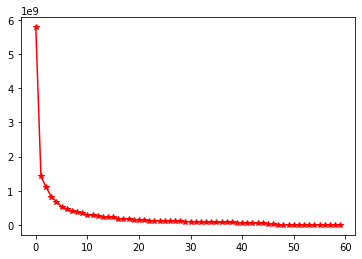

In [8]:
U, mean = pca(img, 0)

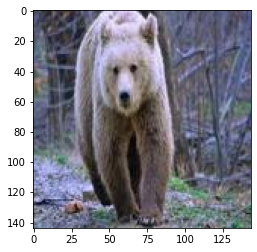

In [9]:
viewcolumn(img[1])

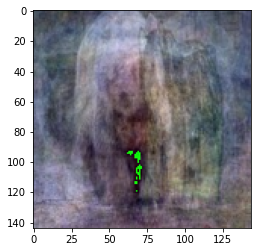

In [10]:
compress(20, U, mean, img[1])

./animals_resize\bear
./animals_resize\caterpillar
./animals_resize\crab
./animals_resize\dog
./animals_resize\flamingo
./animals_resize\horse
./animals_resize\jellyfish
./animals_resize\penguin
./animals_resize\whale
./animals_resize\wolf


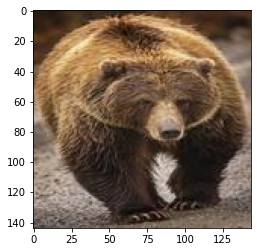

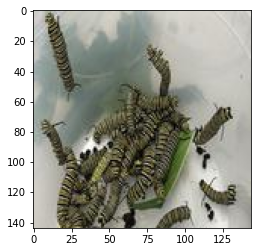

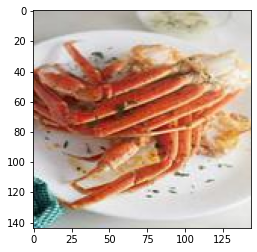

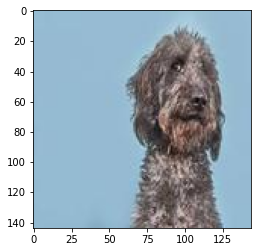

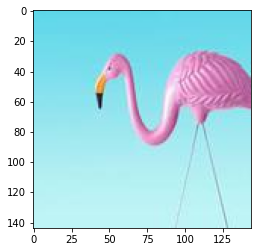

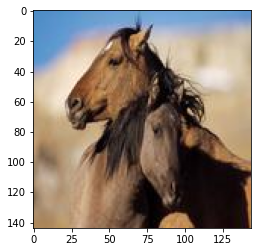

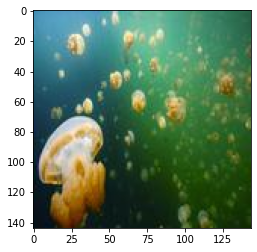

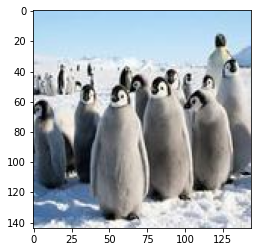

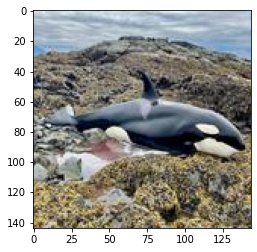

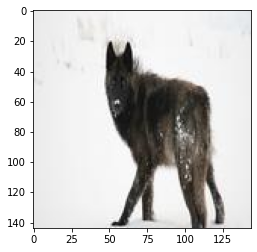

In [11]:
for filename in glob.glob('./animals_resize/*'):
    print(filename)
    img = enterAnimal(filename)
    viewcolumn(img[0])

./animals_resize\bear
./animals_resize\caterpillar
./animals_resize\crab
./animals_resize\dog
./animals_resize\flamingo
./animals_resize\horse
./animals_resize\jellyfish
./animals_resize\penguin
./animals_resize\whale
./animals_resize\wolf


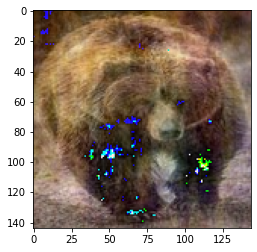

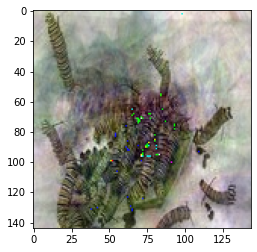

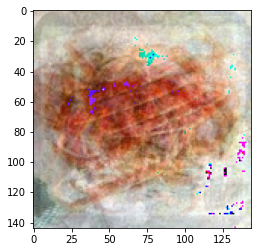

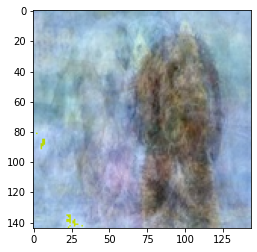

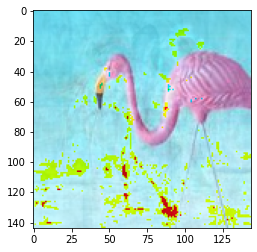

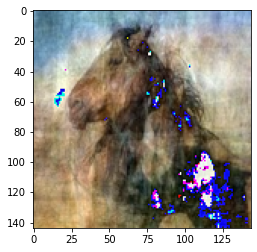

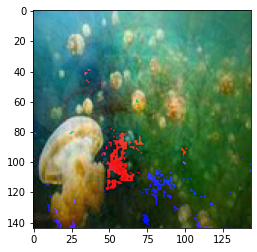

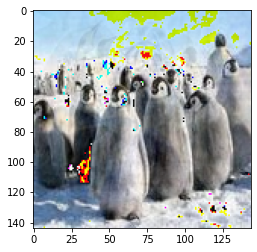

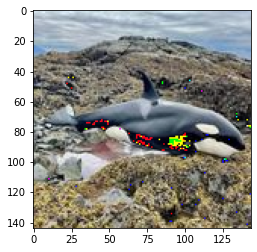

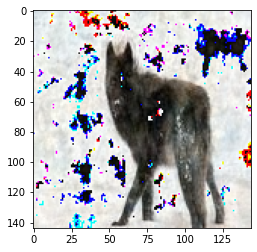

In [12]:
for filename in glob.glob('./animals_resize/*'):
    print(filename)
    img = enterAnimal(filename)
    U, mean = pca(img, 1)
    compress(30, U, mean, img[0])

./animals_resize\bear
./animals_resize\caterpillar
./animals_resize\crab
./animals_resize\dog
./animals_resize\flamingo
./animals_resize\horse
./animals_resize\jellyfish
./animals_resize\penguin
./animals_resize\whale
./animals_resize\wolf


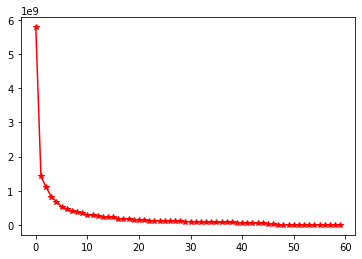

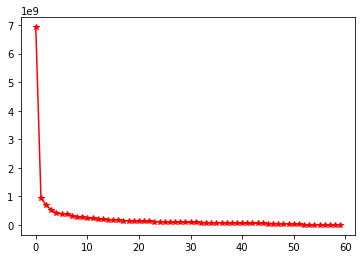

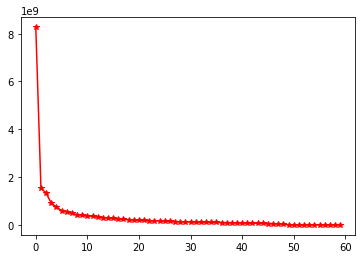

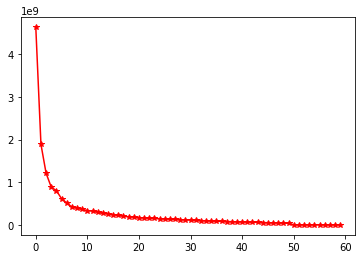

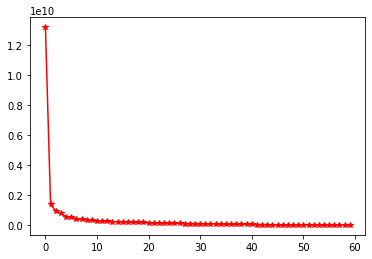

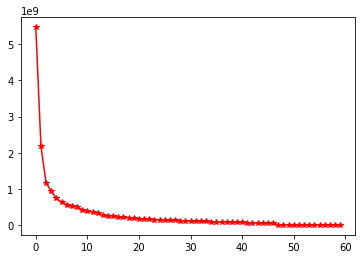

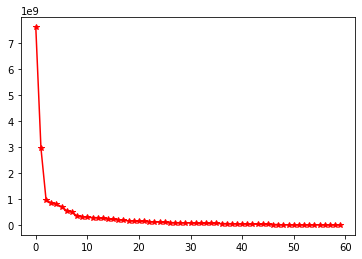

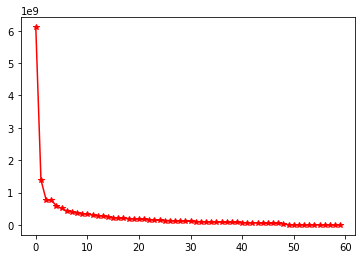

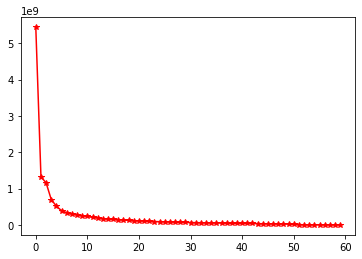

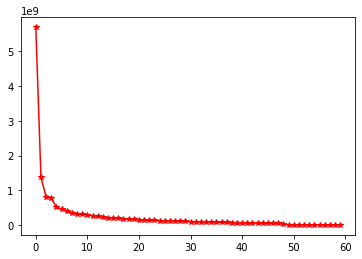

In [13]:
for filename in glob.glob('./animals_resize/*'):
    print(filename)
    img = enterAnimal(filename)
    U, mean = pca(img, 0)